## House Sales in King County, USA

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

| Variable | Description |
|----------|-------------|
| id | A notation for a house |
| date | Date house was sold |
| price | Price is prediction target |
| bedrooms | Number of bedrooms |
| bathrooms | Number of bathrooms |
| sqft_living | Square footage of the home |
| sqft_lot | Square footage the lot |
| floors | Total floors (levels) in the house |
| waterfront | House which has a view to the waterfront |
| view | Has been viewed |
| condition | How good the condition is overall |
| grade | overall grade givent to the housing unit, based on king County grading system |
| sqft_above | Square footage of house apart from basement |
| sqft_basement | Square footage of the basement |
| yr_built | Built year |
| yr_renovated | Year when house was renovated |
| zipcode | Zip code |
| lat | Latitude coordinate |
| long | Longitude coordinate |
| sqft_living15 | Living room area in 2015 (implies some renovations) This might or might not have affected the lotsize area |
| sqft_lot15 | LotSize area in 2015(implies some renovations) |


In [77]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing dataset

In [78]:
#importing dataset from a website and reading it using read_csv method
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

In [79]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [80]:
#Basic insight of the data, data types
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [105]:
df.shape

(21613, 20)

In [81]:
# We can obtain the basic statistics of the dataframe by using the method describe
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Data pre processing or wrangling

We drop the columns 'id' and 'Unnamed: 0' using the method drop(); we do not need the 'id' in our data analysis or model development and 'Unnamed: 0' has no purpose.

In [82]:
df.drop(labels=["id","Unnamed: 0"], axis=1, inplace= True)

In [83]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Evaluating for missing data

In [84]:
#dealing with missing values
missing_data=df.isnull()
missing_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Count missing values in each column

In [85]:
for column in missing_data.columns.values.tolist():
    print (column)
    print(missing_data[column].value_counts())
    print("")

date
False    21613
Name: date, dtype: int64

price
False    21613
Name: price, dtype: int64

bedrooms
False    21600
True        13
Name: bedrooms, dtype: int64

bathrooms
False    21603
True        10
Name: bathrooms, dtype: int64

sqft_living
False    21613
Name: sqft_living, dtype: int64

sqft_lot
False    21613
Name: sqft_lot, dtype: int64

floors
False    21613
Name: floors, dtype: int64

waterfront
False    21613
Name: waterfront, dtype: int64

view
False    21613
Name: view, dtype: int64

condition
False    21613
Name: condition, dtype: int64

grade
False    21613
Name: grade, dtype: int64

sqft_above
False    21613
Name: sqft_above, dtype: int64

sqft_basement
False    21613
Name: sqft_basement, dtype: int64

yr_built
False    21613
Name: yr_built, dtype: int64

yr_renovated
False    21613
Name: yr_renovated, dtype: int64

zipcode
False    21613
Name: zipcode, dtype: int64

lat
False    21613
Name: lat, dtype: int64

long
False    21613
Name: long, dtype: int64

sqft_living15


Based on the above result, we see 2 columns with missing values. 'bedrooms' with 13 missing values, and 'bathrooms' with 10 missing values.

#### Dealing with missing values

We choose to replace the missing values in both columns by the mean value, instead of dropping them and lose data points from the dataset.

In [86]:
mean_bedrooms=df['bedrooms'].mean()
mean_bathrooms=df['bathrooms'].mean()
df['bedrooms'].replace(np.nan, mean_bedrooms, inplace= True)
df['bathrooms'].replace(np.nan, mean_bathrooms, inplace= True)

In [87]:
#to check if the above change is taken place, check missing value in columns 'bedrooms' and 'bathrooms'
print(df['bedrooms'].isnull().sum())
print(df['bathrooms'].isnull().sum())

0
0


#### Correcting data format

We check all data is in the correct format by using .dtypes() to check data types and .astype() to change data types.

In [88]:
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

We see the format of all data is correct.

### Exploratory data analysis

**What are the main cahracteristics that have the most impact on house price in King County?**

**Analyzing Individual Feature Patterns using Visualization**

We can calculate the correlation between variables of the type 'int64' and 'float64' by using the method 'corr'

In [89]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308797,0.525738,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308797,1.000000,0.514194,0.578077,0.032307,0.178022,-0.006800,0.080058,0.026690,0.356589,0.479286,0.302856,0.155749,0.018456,-0.153736,-0.009735,0.130978,0.393356,0.030430
bathrooms,0.525738,0.514194,1.000000,0.755371,0.087929,0.502132,0.063744,0.188341,-0.126197,0.664676,0.686309,0.283428,0.506913,0.050560,-0.204819,0.024246,0.224922,0.569467,0.087539
sqft_living,0.702035,0.578077,0.755371,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.032307,0.087929,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.178022,0.502132,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006800,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.080058,0.188341,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.026690,-0.126197,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356589,0.664676,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


**Categorical Variables**

These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots. We can use seaborn's boxplot to visulize the categorical variabls against the target variable 'price' to see if they are good predictors.

<AxesSubplot:xlabel='waterfront', ylabel='price'>

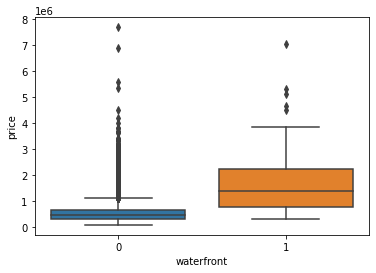

In [90]:
#to see if the categorical varaible 'waterfront' is a good predictor variable to target variable 'price'
sns.boxplot(x='waterfront', y='price', data=df)

We see from the boxplot that the houses without waterfront view have more outliers. Other than that, there is a distinction in price between houses with waterfront view and without, therefore, 'waterfront' could be a good predictor of 'price'.

<AxesSubplot:xlabel='grade', ylabel='price'>

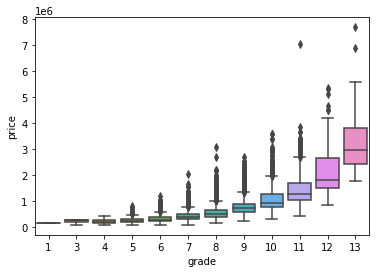

In [91]:
#to see if the categorical variable 'grade' is a good predictor for 'price'
sns.boxplot( x= 'grade', y='price', data=df)

We can see from the boxplot that the 'price' increased as the overall grade of the house increased in value. So it looks like 'grade' might be a good predictor of 'price'.

<AxesSubplot:xlabel='condition', ylabel='price'>

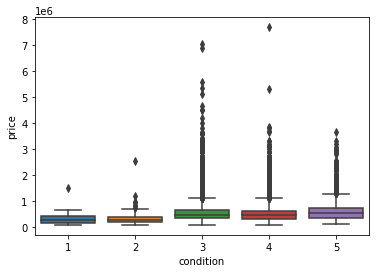

In [92]:
#to see if 'condition' is a good predictor of 'price'
sns.boxplot(x='condition', y='price', data=df)

There is a lot of overlap in the boxplot of the different conditions and therefore 'condition' might not be a good predictor of price.

We can use the method value_counts() to count the unique category values of the categorical variables and use the method .to_frame() to convert it to a dataframe.

In [93]:
df['waterfront'].value_counts().to_frame()

,waterfront
0,21450
1,163


In [94]:
df['view'].value_counts().to_frame()

,view
0,19489
2,963
3,510
1,332
4,319


In [95]:
df['condition'].value_counts().to_frame()

,condition
3,14031
4,5679
5,1701
2,172
1,30


**Continuous Numerical Variables:**

Continuous numerical variables are variables that may contain any value within some range. They can be of type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.
In order to start understanding the (linear) relationship between an individual variable and the price, we can use "regplot" which plots the scatterplot plus the fitted regression line for the data.

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

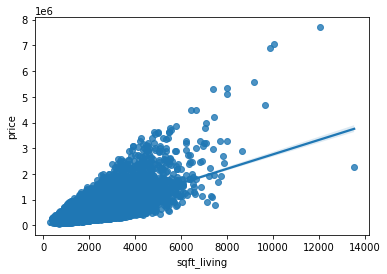

In [96]:
# 'sqft_living' as a potential predictor varaible of price
sns.regplot(x='sqft_living', y='price', data=df)

As we see from scatter plot with fitted line, as the 'sqft_living' increases in value, so does the price. Therefore, there is a positive correlation between 'sqft_living' and 'price'.

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

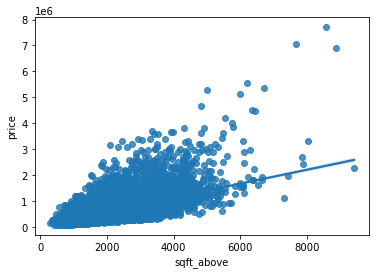

In [97]:
# 'sqft_above' as a potential predictor variable of price
sns.regplot(x='sqft_above', y='price', data=df)

There is a positive correlation between the two variables.

<AxesSubplot:xlabel='sqft_living15', ylabel='price'>

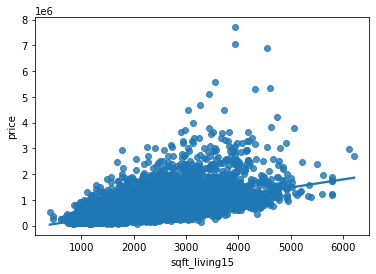

In [98]:
# 'sqft_living15' as a potential predictor variable of price
sns.regplot(x='sqft_living15', y='price', data=df)

There is a positive correlation between the two variables not as strong as the above ones.

We can use .corr() method to find the correlation value of the variables with the target variable 'price' and use the method .sort_values() to sort them in ascending order.

In [99]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

**Conclusion**

From visualization of individual variables of the type categorical and continuous and what the data looks like, we are able to identify the important variables to predict price.
We narrowed down to these variables:
Continuous variableds
- sqft_living
- sqft_above
- sqft_living15
- bathrooms <br>
Categorical variables
- grade